#  Used Car Prices Prediction

 

In [1]:
#********************************************************** 
#************# Predicting Used Car Prices #****************
#************#  Tuwaiq_Four_Week-master   #****************
#********************************************************** 

# How To Predicting Used Car Prices?
Determining whether the listed price of a used car is a challenging task, for many factors that drive a used vehicle’s price on the market. The focus of this project is developing machine learning models that can accurately predict the price of a used car based on its features

# Tools
There are tools that will be used to achieve the goal of this study, such as: ``` matplotlib, pandas, numpy , seaborn  ```
for discovering the data and train a model. The work will be done through Jupyter notebook.

# Import library

In [2]:
#First Step Import the library 

import numpy as np  
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
plt.style.use('ggplot')

In [3]:
## Uploade the Dateset From local (UsedCarsSA_UNClean_EN) The Data set is 
## Downloaded From (https://www.kaggle.com/turkibintalib/saudi-arabia-used-cars-dataset)

df = pd.read_csv("UsedCarsSA_UNClean_EN.csv")

# Data cleaning
Second Step Check Data And see the cloumns datetype and missing value 



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


In [5]:
data_Clean = df.drop('Link', axis=1)

In [6]:
data_Clean 

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8245,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,Used,260,Najran,Negotiable,True
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


In [7]:
data_Clean.isnull().sum()

Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2266
Fuel_Type         0
Gear_Type        74
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [8]:
#Filling The missing Value in Origin and Options and Gear_Type  with the (method 'bfill')
#Origin           95
#Options         109
#Gear_Type        74
data_Clean['Origin'].fillna(method='bfill', inplace=True)
data_Clean['Options'].fillna(method='bfill',inplace=True)
data_Clean['Gear_Type'].fillna(method='bfill',inplace=True)
## Show The NULL 
data_Clean.isnull().sum()

Make              0
Type              0
Year              0
Origin            0
Color             0
Options           0
Engine_Size    2266
Fuel_Type         0
Gear_Type         0
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [9]:
### Filling The missing Value in Engine_Size with the std() 

data_Clean.fillna(value=data_Clean['Engine_Size'].std(),inplace=True)
data_Clean.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Condition      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [10]:
##The price column contains some String values and we need to process them
## and replace all the values that contain negotiable with the NAN
data_Clean['Price'].replace('Negotiable', np.NaN ,inplace=True)

In [11]:
data_Clean.isnull().sum()

Make              0
Type              0
Year              0
Origin            0
Color             0
Options           0
Engine_Size       0
Fuel_Type         0
Gear_Type         0
Condition         0
Mileage           0
Region            0
Price          2596
Negotiable        0
dtype: int64

In [12]:
## Now we have NAN in 2596 rows, and because it is difficult to replace the average or mein or std in the price
## because it well effect on the question, we delete all the rows that contain the values in the price column
data_Clean.dropna(how='any',inplace=True)
data_Clean.isnull().sum()
data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5652 non-null   object 
 1   Type         5652 non-null   object 
 2   Year         5652 non-null   int64  
 3   Origin       5652 non-null   object 
 4   Color        5652 non-null   object 
 5   Options      5652 non-null   object 
 6   Engine_Size  5652 non-null   float64
 7   Fuel_Type    5652 non-null   object 
 8   Gear_Type    5652 non-null   object 
 9   Condition    5652 non-null   object 
 10  Mileage      5652 non-null   int64  
 11  Region       5652 non-null   object 
 12  Price        5652 non-null   object 
 13  Negotiable   5652 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 623.7+ KB


In [13]:
## 12  Price        5652 non-null   object  
## her the price is (object) we need To Convert it to (int)
data_Clean['Price'] = data_Clean['Price'].astype(float)
data_Clean['Mileage'] = data_Clean['Mileage'].astype(float)
data_Clean['Type'] = data_Clean['Type'].astype(str)
data_Clean['Make'] = data_Clean['Make'].astype(str)

data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5652 non-null   object 
 1   Type         5652 non-null   object 
 2   Year         5652 non-null   int64  
 3   Origin       5652 non-null   object 
 4   Color        5652 non-null   object 
 5   Options      5652 non-null   object 
 6   Engine_Size  5652 non-null   float64
 7   Fuel_Type    5652 non-null   object 
 8   Gear_Type    5652 non-null   object 
 9   Condition    5652 non-null   object 
 10  Mileage      5652 non-null   float64
 11  Region       5652 non-null   object 
 12  Price        5652 non-null   float64
 13  Negotiable   5652 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 623.7+ KB


In [14]:
data_Clean.Options.unique()

array(['Full', 'Standard', 'Semi Full'], dtype=object)

In [15]:
data_Clean.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000.0,Riyadh,114000.0,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912.0,Riyadh,59500.0,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,Used,39000.0,Riyadh,72000.0,False


In [16]:
data_Clean.Make.unique()

array(['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'Chevrolet',
       'Mercedes', 'MINI', 'Lexus', 'Land Rover', 'GMC', 'Mazda', 'Ford',
       'Kia', 'Genesis', 'Cadillac', 'Geely', 'MG', 'Jeep', 'INFINITI',
       'Dodge', 'Ferrari', 'Great Wall', 'Jaguar', 'GAC', 'Renault',
       'Suzuki', 'Peugeot', 'Changan', 'HAVAL', 'BMW', 'Rolls-Royce',
       'Porsche', 'Mitsubishi', 'Subaru', 'Zhengzhou', 'Audi', 'Lincoln',
       'Daihatsu', 'Bentley', 'FAW', 'Chery', 'Isuzu', 'Aston Martin',
       'Volkswagen', 'Fiat', 'Pontiac', 'Mercury', 'Classic', 'Hummer',
       'BYD', 'Maserati', 'Other', 'Lifan', 'Foton', 'Victory Auto',
       'Tata', 'Škoda', 'Iveco', 'Volvo', 'Ashok', 'JAC'], dtype=object)

In [17]:
data_Clean.Type.unique()

array(['C300', 'Sunny', 'Elantra', 'Accord', 'Land Cruiser', 'Impala',
       'Yaris', 'Camry', 'Patrol', 'Tahoe', 'CLA', 'E', 'Accent',
       'Corolla', 'Copper', 'Prado', 'Civic', 'Furniture', 'RX',
       'Range Rover', 'Yukon', 'Bus Urvan', 'Aurion', 'Malibu', 'Rav4',
       'CX9', 'Expedition', 'ES', 'Cadenza', 'Tucson', 'Platinum', 'G80',
       'Sonata', 'LX', 'GX', 'Azera', 'CT-S', 'EC7', 'ZS', 'Kona',
       'Grand Cherokee', 'S', 'M', 'Charger', 'Taurus', 'GTB 599 Fiorano',
       'Royal', 'Picanto', 'Power', 'Datsun', 'F-Pace', 'Hilux',
       'Suburban', 'Explorer', 'FJ', 'Senta fe', 'Optima', 'GS8',
       'Maxima', 'Caprice', 'Challenger', 'Camaro', 'Symbol', 'Fluence',
       '6', 'RX5', 'Avalon', 'APV', '3008', 'SRX', 'Cerato', 'Traverse',
       'Sierra', 'F150', 'Genesis', 'NX', 'C', 'G70', 'Flex', 'UX',
       'Dyna', 'Cores', 'Creta', 'Rio', 'Odyssey', 'EC8', 'Sylvian Bus',
       'H1', 'Ciocca', 'Land Cruiser Pickup', 'Cressida', 'Duster',
       'Seven', 'GLC', '

In [18]:
data_Clean.Fuel_Type.unique()

array(['Gas', 'Diesel', 'Hybrid'], dtype=object)

In [19]:
data_Clean.Gear_Type.unique()

array(['Automatic', 'Manual'], dtype=object)

In [20]:
#encoding the categorical Data by 0 - 1 - 2 
#Options Full ==  0  \\ Semi Full == 1 ,  Standard == 2 
#Fuel_Type Gas ==  0  \\ Diesel == 1 ,  Hybrid == 2 
#Gear_Type Automatic ==  0  \\ Manual == 1 

data_Clean.replace({'Options':{'Full':0,'Semi Full':1,'Standard':2}}, inplace=True)

data_Clean.replace({'Fuel_Type':{'Gas':0,'Diesel':2,'Hybrid':1}}, inplace=True)

data_Clean.replace({'Gear_Type':{'Automatic':0,'Manual':1}}, inplace=True)

# Drop unnecessary columns(Make','Origin','Color','Condition','Region','Negotiable','Car_Group)
# data_Clean.drop(['Make','Origin','Color','Condition','Region','Negotiable'], axis = 1, inplace=True)


In [21]:
data_Clean.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,0,5.7,0,0,Used,103000.0,Riyadh,114000.0,False
2,Nissan,Sunny,2019,Saudi,Silver,2,1.5,0,0,Used,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,2,1.6,0,0,Used,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,1,2.0,0,0,Used,41912.0,Riyadh,59500.0,False
5,Honda,Accord,2018,Saudi,Navy,0,1.5,0,0,Used,39000.0,Riyadh,72000.0,False


In [22]:
# data_Clean.drop(['Type'], axis = 1, inplace=True)

# Visualising Categorical Data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


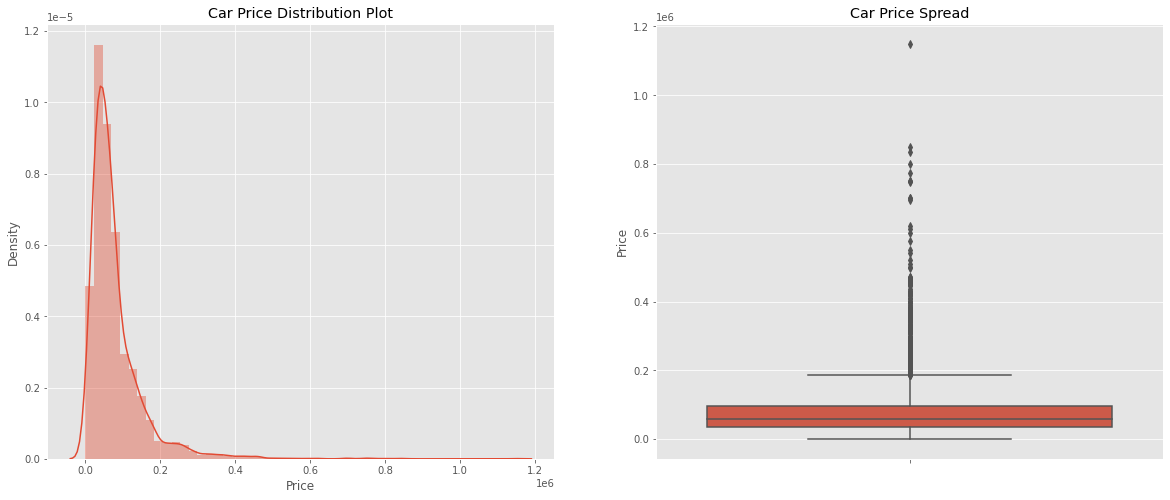

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data_Clean.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data_Clean.Price)

plt.show()

In [24]:
print(data_Clean.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.652000e+03
mean     7.853659e+04
std      7.607374e+04
min      0.000000e+00
25%      3.500000e+04
50%      5.800000e+04
75%      9.500000e+04
85%      1.290000e+05
90%      1.550000e+05
100%     1.150000e+06
max      1.150000e+06
Name: Price, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Make Histogram'}, xlabel='Make', ylabel='count'>

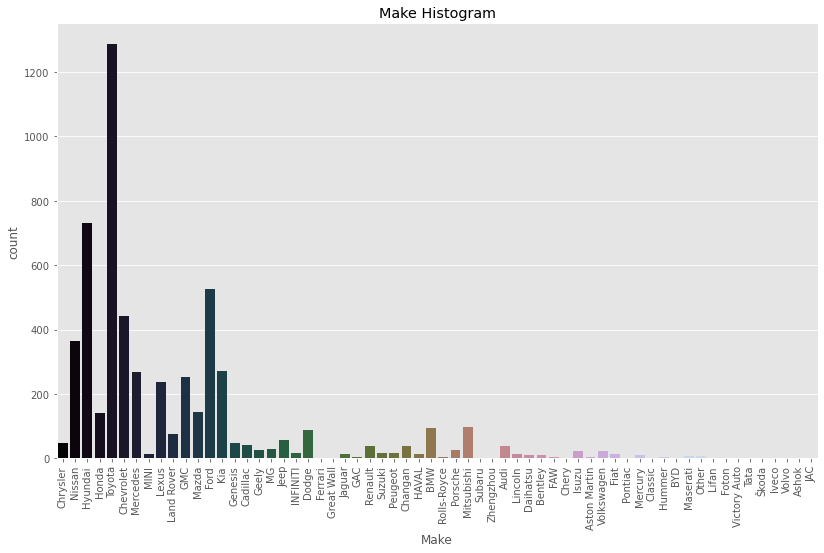

In [25]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Make Histogram')
plt.xticks(rotation='vertical')
sns.countplot(data_Clean.Make, palette=("cubehelix"))





/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Engine_Size Histogram'}, xlabel='Engine_Size', ylabel='count'>

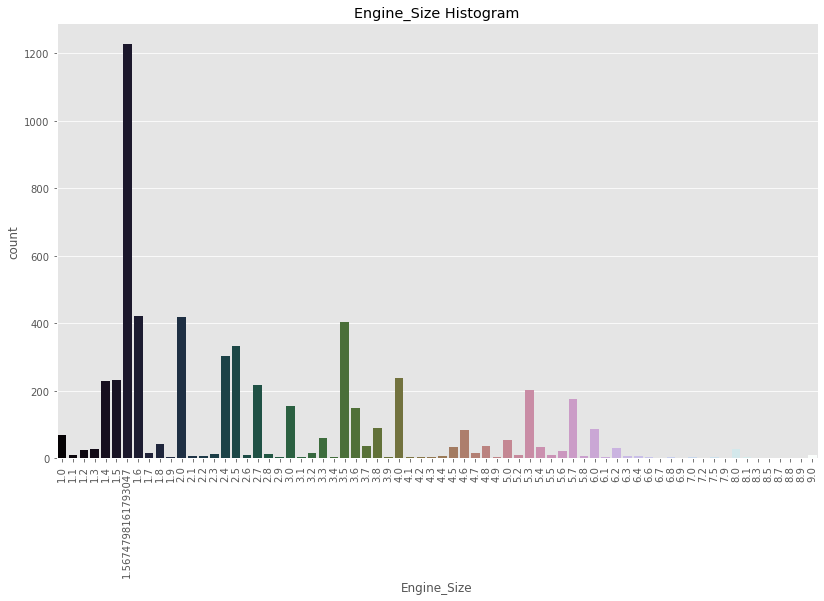

In [26]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Engine_Size Histogram')
plt.xticks(rotation='vertical')
sns.countplot(data_Clean.Engine_Size, palette=("cubehelix"))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Region Histogram'}, xlabel='Region', ylabel='count'>

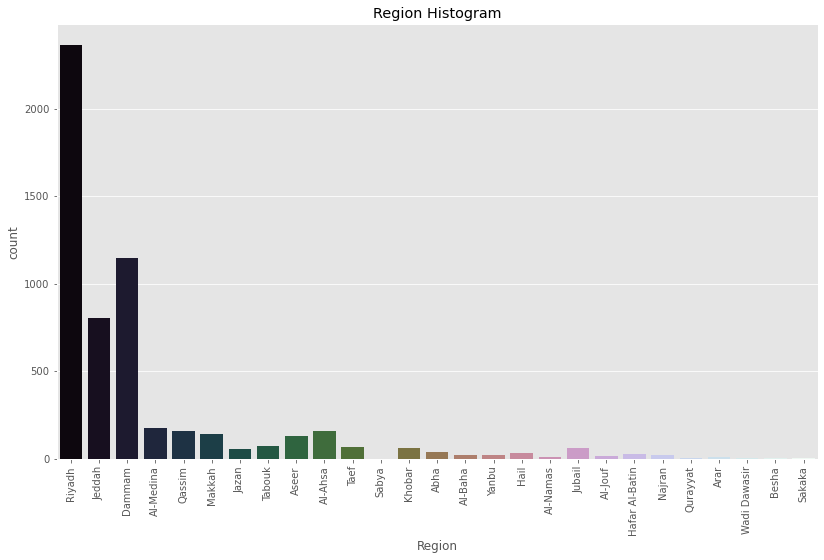

In [27]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Region Histogram')
plt.xticks(rotation='vertical')
sns.countplot(data_Clean.Region, palette=("cubehelix"))



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Color Histogram'}, xlabel='Color', ylabel='count'>

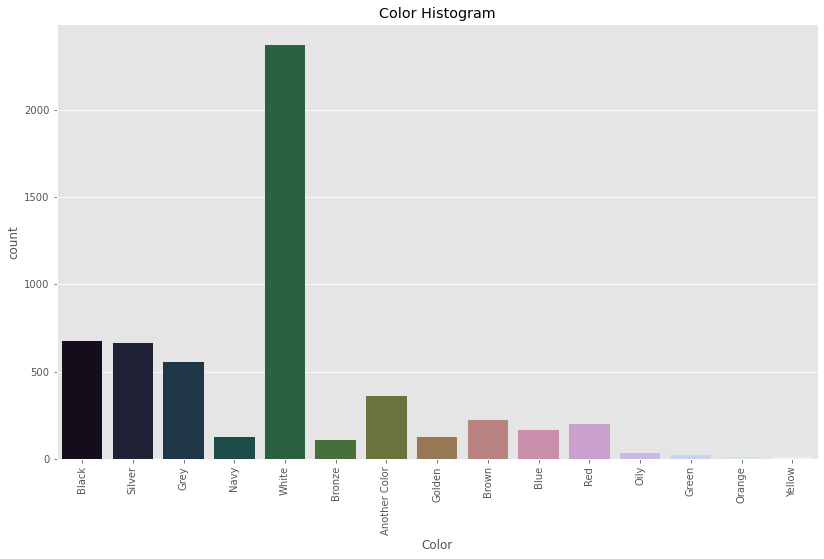

In [28]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Color Histogram')
plt.xticks(rotation='vertical')
sns.countplot(data_Clean.Color, palette=("cubehelix"))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Year Histogram'}, xlabel='Year', ylabel='count'>

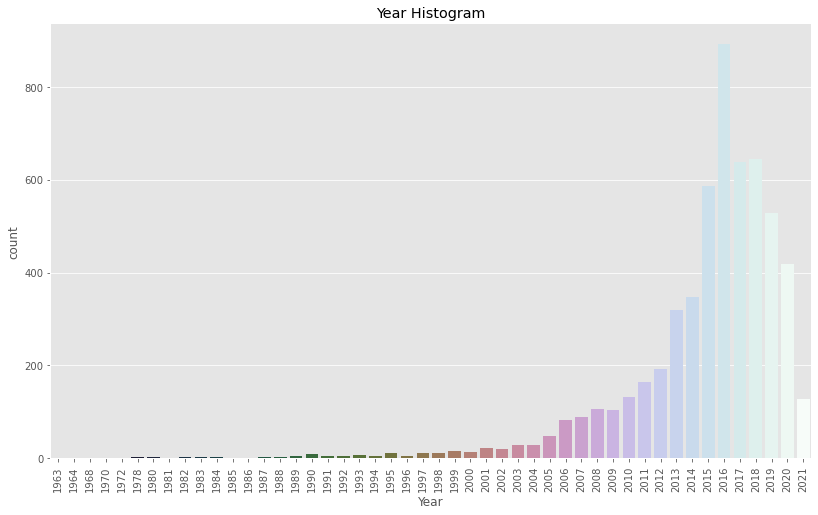

In [29]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Year Histogram')
plt.xticks(rotation='vertical')
sns.countplot(data_Clean.Year, palette=("cubehelix"))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Fuel_Type Histogram'}, xlabel='Fuel_Type', ylabel='count'>

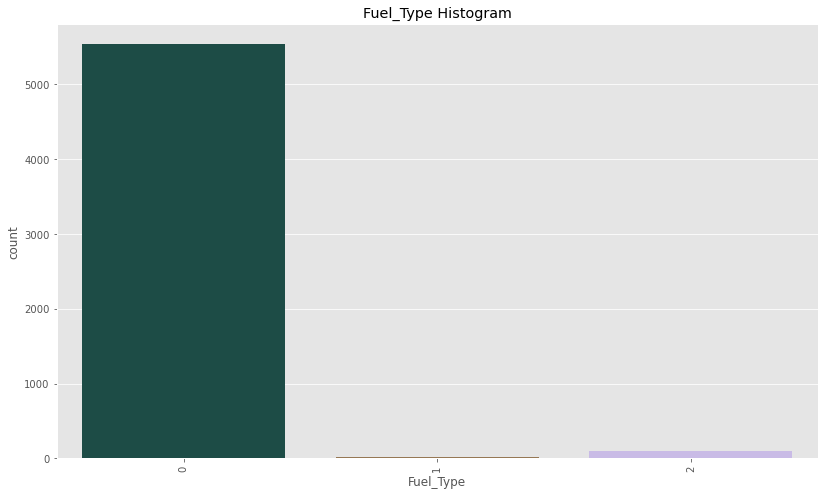

In [30]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Fuel_Type Histogram')
plt.xticks(rotation='vertical')
sns.countplot(data_Clean.Fuel_Type, palette=("cubehelix"))

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


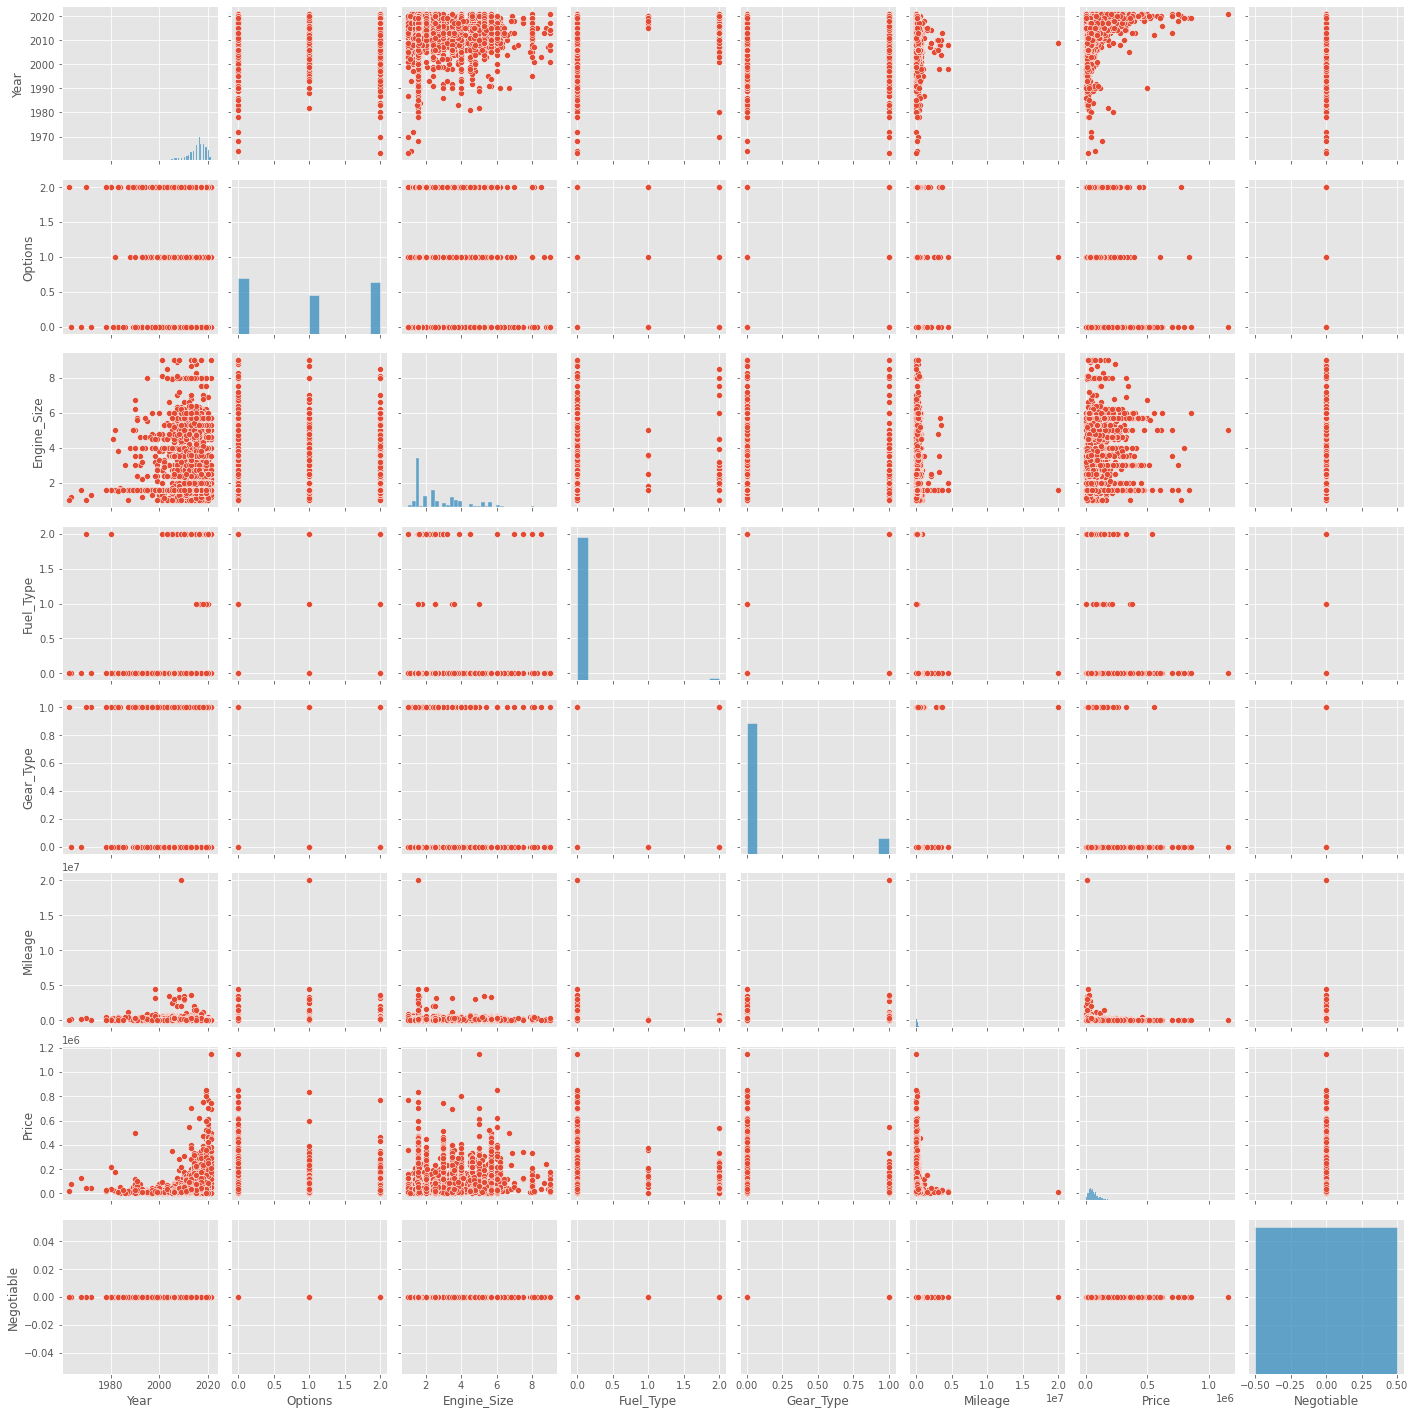

In [31]:
sns.pairplot(data_Clean)
plt.show()

In [32]:
data_Clean

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,0,5.70000,0,0,Used,103000.0,Riyadh,114000.0,False
2,Nissan,Sunny,2019,Saudi,Silver,2,1.50000,0,0,Used,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,2,1.60000,0,0,Used,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,1,2.00000,0,0,Used,41912.0,Riyadh,59500.0,False
5,Honda,Accord,2018,Saudi,Navy,0,1.50000,0,0,Used,39000.0,Riyadh,72000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,Kia,Sorento,2006,Saudi,Navy,0,3.50000,0,1,Used,257000.0,Dammam,15000.0,False
8243,Audi,A6,2015,Saudi,Silver,0,1.56748,0,0,Used,77000.0,Riyadh,75000.0,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,0,1.56748,0,0,Used,150000.0,Riyadh,53000.0,False
8246,Nissan,Altima,2011,Saudi,Silver,0,2.50000,0,0,Used,18500.0,Aseer,22000.0,False


<AxesSubplot:>

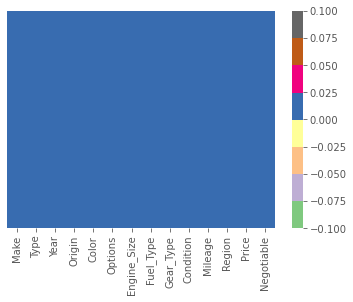

In [33]:
sns.heatmap(data_Clean.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [34]:
# After we clean the data, we extract the data in the form of a file CSV in The Name "UsedCarsSA_Clean_EN"

data_Clean.to_csv("UsedCarsSA_Clean_EN.csv")


In [35]:
data_Clean.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,0,5.7,0,0,Used,103000.0,Riyadh,114000.0,False
2,Nissan,Sunny,2019,Saudi,Silver,2,1.5,0,0,Used,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,2,1.6,0,0,Used,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,1,2.0,0,0,Used,41912.0,Riyadh,59500.0,False
5,Honda,Accord,2018,Saudi,Navy,0,1.5,0,0,Used,39000.0,Riyadh,72000.0,False


In [36]:
data_Clean.Year.max()

2021

In [37]:
counts = data_Clean.Year.value_counts()
counts

2016    892
2018    645
2017    639
2015    586
2019    528
2020    418
2014    348
2013    320
2012    193
2011    164
2010    132
2021    128
2008    107
2009    104
2007     90
2006     82
2005     48
2003     29
2004     29
2001     23
2002     21
1999     15
2000     14
1995     12
1997     11
1998     11
1990      9
1993      7
1991      5
1994      5
1996      5
1992      4
1989      4
1978      3
1983      3
1987      2
1988      2
1984      2
1980      2
1982      2
1985      1
1972      1
1981      1
1986      1
1968      1
1963      1
1970      1
1964      1
Name: Year, dtype: int64

In [38]:
data_Clean

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,0,5.70000,0,0,Used,103000.0,Riyadh,114000.0,False
2,Nissan,Sunny,2019,Saudi,Silver,2,1.50000,0,0,Used,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,2,1.60000,0,0,Used,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,1,2.00000,0,0,Used,41912.0,Riyadh,59500.0,False
5,Honda,Accord,2018,Saudi,Navy,0,1.50000,0,0,Used,39000.0,Riyadh,72000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,Kia,Sorento,2006,Saudi,Navy,0,3.50000,0,1,Used,257000.0,Dammam,15000.0,False
8243,Audi,A6,2015,Saudi,Silver,0,1.56748,0,0,Used,77000.0,Riyadh,75000.0,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,0,1.56748,0,0,Used,150000.0,Riyadh,53000.0,False
8246,Nissan,Altima,2011,Saudi,Silver,0,2.50000,0,0,Used,18500.0,Aseer,22000.0,False


In [39]:
df= pd.read_csv('UsedCarsSA_Clean_EN.csv')

In [40]:
df.describe()

,Unnamed: 0,Year,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Price
count,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5.652000e+03,5.652000e+03
mean,3764.598549,2014.788217,0.968153,2.759235,0.038393,0.107396,1.401082e+05,7.853659e+04
std,2393.146479,5.220691,0.855543,1.456967,0.270233,0.309643,3.340451e+05,7.607374e+04
min,0.000000,1963.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+02,0.000000e+00
25%,1675.750000,2013.000000,0.000000,1.567480,0.000000,0.000000,4.648450e+04,3.500000e+04
50%,3574.500000,2016.000000,1.000000,2.400000,0.000000,0.000000,1.010000e+05,5.800000e+04
75%,5798.250000,2018.000000,2.000000,3.500000,0.000000,0.000000,1.810000e+05,9.500000e+04
max,8247.000000,2021.000000,2.000000,9.000000,2.000000,1.000000,2.000000e+07,1.150000e+06


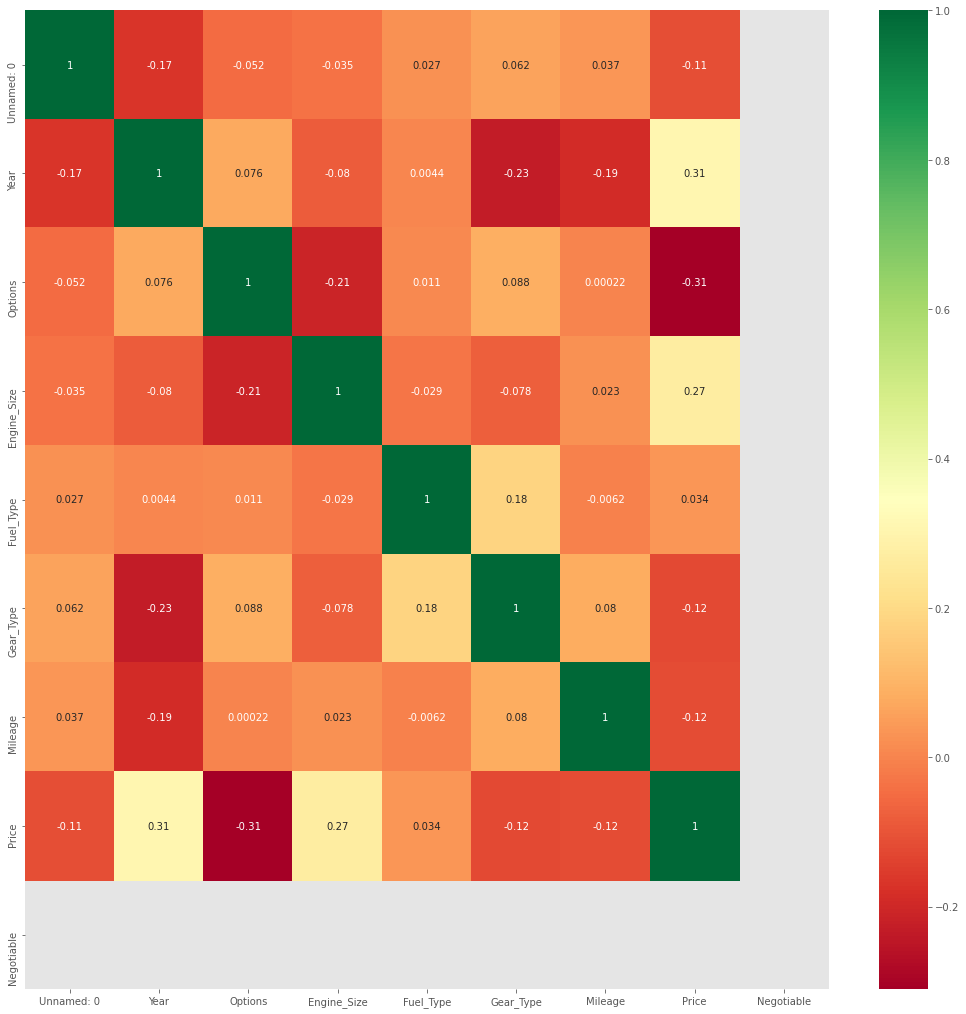

In [41]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [42]:
X = df.loc[:,['Year','Engine_Size']]
X.shape

(5652, 2)

In [43]:
y = df.loc[:,['Price']]
y.head()

,Price
0,114000.0
1,27500.0
2,43000.0
3,59500.0
4,72000.0


From the above correlation heat map, we can conclude that :- price and Year variables are highly positively correlated (correlation coefficient = 0.31). price and Engine_Size variables are also highly positively correlated (correlation coefficient = 0.27).

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-44-914d803b91a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

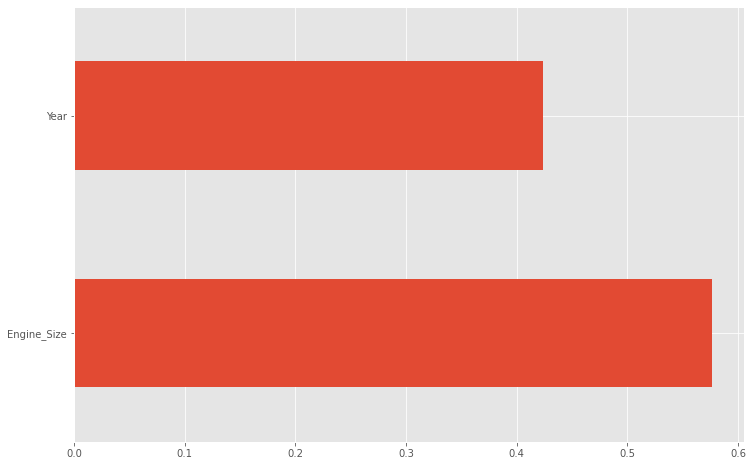

In [45]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [47]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.1774668289792991
Accuracy on Testing set:  0.1995642931661309


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

<ipython-input-48-d4d870abb6b4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Accuracy on Traing set:  0.544389603068285
Accuracy on Testing set:  0.4709580625640968


In [49]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  29657.013173972868
Mean Squared  Error      :  2760069243.012557
Root Mean Squared  Error :  52536.36115123084
R Squared Error          :  0.4709580625640968


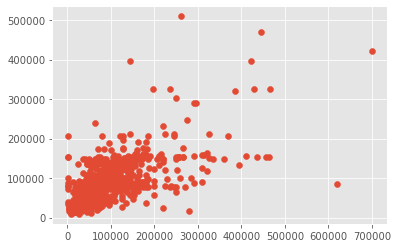

In [51]:
plt.scatter(y_test,y_pred)